In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import numpy as np
import scipy.signal

#%matplotlib notebook
%matplotlib inline
mpl.rcParams['figure.figsize'] = (18, 6)

from __future__ import print_function


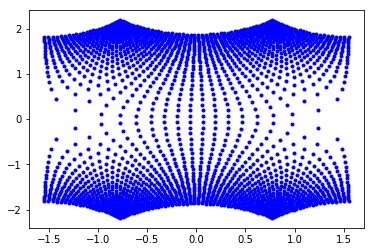

In [54]:
# plot moebius transform of sinusoid

def z(n):
  t = np.linspace(-np.pi, np.pi, 1000)
  c = 0.25 * n
  for n in range(1,n+1):
      c = c - (-1) ** n * np.exp(1j * n * t) / (2 * n)
  return c.view('(2,)float').T

s = 50
r = np.outer(np.ones(s),np.linspace(-np.pi, np.pi, s))
i = np.outer(np.linspace(-np.pi, np.pi, s), 1j* np.ones(s))

z = r + i
#print(z)

c = np.arcsin(z)

#print(z.shape)

#print(z[0,0])

#plt.plot( z(2), *z(3), *z(4), *z(5), *z(6), '-', lw=3 )
plt.plot( np.real(c), np.imag(c),  'b.')

plt.show()



In [103]:
width = 120
height = 120
out = np.zeros((width,height,3),dtype=float)


def getcolor(f):
    return(f)

for w in range(width):
    for h in range(height):

        x = (w - width/2)/float(width) 
        y = (h - height/2)/float(height)
        r = np.sin(x*x + y)
        #r = np.sin(x*x + y*y)
        th = np.arctan2(y,x)
        #print x, y, r
        #out[w,h,:] = [0, 0, 0]
        day = int(200*th*8/(4*np.pi))
        # want to show morning, so outside (max) is zero and inside (min) is 1/2
        #out[h,w] = getcolor(daysg[day],0.5*(1-r))
        #out[h,w] = getcolor(0.5*np.cosh(2*x - 1) + np.sinh(y))
        out[h,w] = getcolor(2*(np.cosh(x) - 1))
        # want to show evening, so outside (max) is 1 and inside (min) is 1/2
        #out[h,w] = getcolor(days[200],1.2*(r + 1)/2)
        #out[h,w] = getcolor(days[200],r)
        
        
    

plt.figure(figsize = (12,12))
plt.imshow(out)
plt.axis('off')    
#plt.savefig('radial4.png')

SyntaxError: invalid syntax (<ipython-input-103-c4fb7a1eb836>, line 31)

In [2]:
import os, glob, sys

files = glob.glob('csv/c*.csv')
# make sure we get a consistent order.
files.sort()
data = []
for name in files: 
    try:
        print " reading  file " + name
        thisfile = np.loadtxt(name, skiprows=1, usecols=tuple((0,1,2,3,4)),delimiter=",")
        thisfile = scipy.signal.decimate(thisfile, 10, n=None, ftype='iir', axis=0, zero_phase=True)
        data.append(thisfile)
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            pass
        else: # Do not fail if a directory is found, just ignore it.
            raise exc # Propagate other kinds of IOError.
#c = np.loadtxt("c18-06-24-12_00.csv",skiprows=1,usecols=(0,1,2,3,4),delimiter=",")
#c = np.loadtxt("c18-07-01-12_00.csv",skiprows=1,usecols=(0,1,2,3,4),delimiter=",")
#print(c.shape)
print "done"

 reading  file csv\c18-06-22-12_00.csv


C:\Users\foote\Anaconda2\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\Users\foote\Anaconda2\lib\site-packages\scipy\signal\signaltools.py:3463: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


 reading  file csv\c18-06-23-12_00.csv
 reading  file csv\c18-06-24-12_00.csv
 reading  file csv\c18-06-25-12_00.csv
 reading  file csv\c18-06-26-12_00.csv
 reading  file csv\c18-06-27-12_00.csv
 reading  file csv\c18-06-28-12_00.csv
 reading  file csv\c18-06-29-12_00.csv
 reading  file csv\c18-06-30-12_00.csv
 reading  file csv\c18-07-01-12_00.csv
 reading  file csv\c18-07-02-12_00.csv
 reading  file csv\c18-07-03-12_00.csv
 reading  file csv\c18-07-04-12_00.csv
 reading  file csv\c18-07-05-12_00.csv
 reading  file csv\c18-07-06-12_00.csv
 reading  file csv\c18-07-07-12_00.csv
 reading  file csv\c18-07-08-12_00.csv
 reading  file csv\c18-07-09-12_00.csv
 reading  file csv\c18-07-10-12_00.csv
 reading  file csv\c18-07-11-12_00.csv
 reading  file csv\c18-07-12-12_00.csv
 reading  file csv\c18-07-13-12_00.csv
 reading  file csv\c18-07-14-12_00.csv
 reading  file csv\c18-07-15-12_00.csv
 reading  file csv\c18-07-16-12_00.csv
 reading  file csv\c18-07-17-12_00.csv
 reading  file csv\c18-07

In [4]:
# massage data and plot

day = 7420 # this many indexes in a day, roughly
hour = int(float(day)/24.) # chop this off to correct for dst
newd = []
d = data[0]
oldt = d[0,0]
dst = True
for i, d in enumerate(data[:]):
    if d.shape[0] > 7420:
        print d.shape
        t = d[0,0]
        print(t -oldt)
        if (t - oldt) > 88000 and (t - oldt < 90000):
            dst = False
        if dst:
            # add in an hour to time 
            newd.append(d[hour:7420,:])
            print("DST")
        else:
            newd.append(d[0:7420-hour,:])
        oldt = t
            
        #del data
#print newd[0]
                    

(7429L, 5L)
0.0
DST
(7428L, 5L)
85400.5371696949
DST
(7429L, 5L)
85418.2073469162
DST
(7428L, 5L)
85414.85457324982
DST
(7428L, 5L)
85405.48204135895
DST
(7429L, 5L)
85416.13233852386
DST
(7428L, 5L)
85402.60904598236
DST
(7428L, 5L)
85410.20818066597
DST
(7429L, 5L)
85421.52845478058
DST
(7429L, 5L)
85399.5645647049
DST
(7429L, 5L)
170839.68719673157
DST
(7429L, 5L)
85395.65706181526
DST
(7428L, 5L)
85405.18755626678
DST
(7429L, 5L)
85428.35039806366
DST
(7429L, 5L)
85398.70122623444
DST
(7429L, 5L)
85415.22147083282
DST
(7429L, 5L)
85416.46578884125
DST
(7429L, 5L)
85416.86077237129
DST
(7429L, 5L)
85400.23373889923
DST
(7429L, 5L)
85410.0626783371
DST
(7429L, 5L)
85421.24379634857
DST
(7429L, 5L)
85407.31563282013
DST
(7429L, 5L)
85405.79786229134
DST
(7429L, 5L)
85420.5036020279
DST
(7429L, 5L)
85403.76998233795
DST
(7429L, 5L)
85411.01527309418
DST
(7429L, 5L)
85413.29450893402
DST
(7429L, 5L)
85407.22319889069
DST
(7428L, 5L)
85414.63500523567
DST
(7429L, 5L)
85404.84235668182
DS

(7111L,)
[[3.38935596e-05 3.38236266e-05 3.38316990e-05]
 [3.35569856e-05 3.38458295e-05 3.38394207e-05]
 [3.43168714e-05 3.38252004e-05 3.38289087e-05]
 ...
 [3.38339250e-05 3.38343798e-05 3.38343799e-05]
 [3.38349350e-05 3.38343798e-05 3.38343798e-05]
 [3.38338907e-05 3.38343798e-05 3.38343798e-05]]


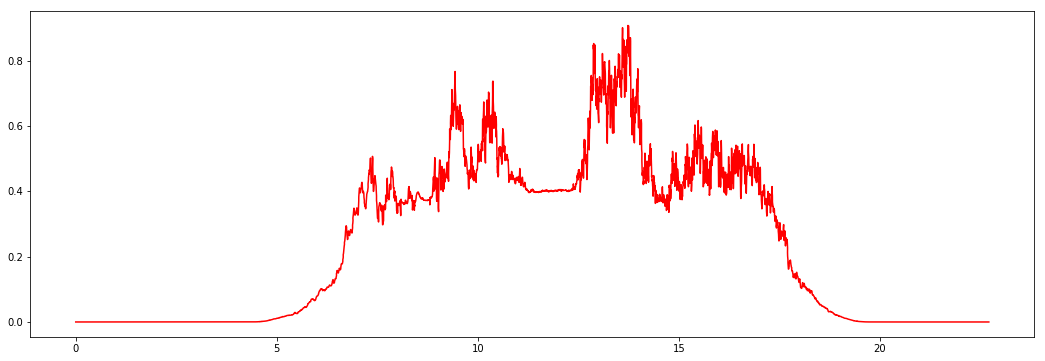

In [5]:
c = newd[2]
time = c[:,0]
time = (time - time[0])/3600

cmean = np.mean(c[:,1:4],axis=1)
print cmean.shape

#plt.plot(time,c[:,1] -cmean,'r')
#plt.plot(time,c[:,2] - cmean ,'g')
#plt.plot(time,c[:,3]- cmean,'b')

#plt.plot(time,cmean,'k')
#plt.savefig("graph.png")

normc = c[:,1:4]/np.max(c[:,1:4])
plt.plot(time,normc[:,1],'r')

print normc

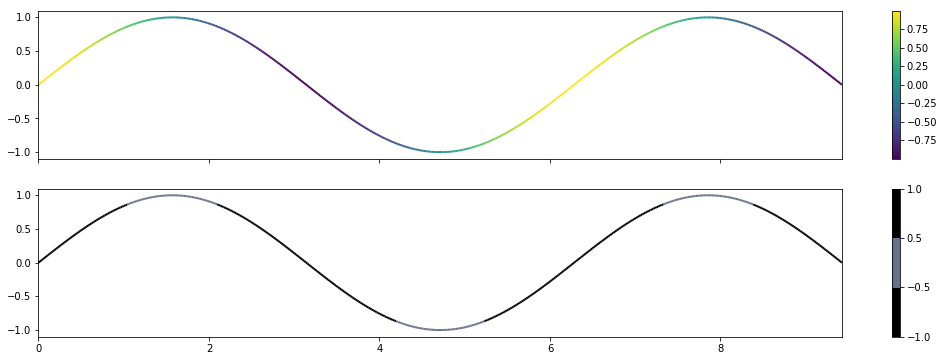

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead

cmap = ListedColormap(normc, name='skycolor', N=None)

#cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

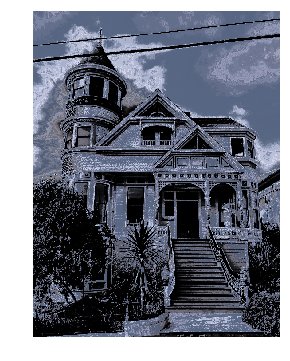

<Figure size 1296x432 with 0 Axes>

In [76]:
from PIL import Image

fname = 'stoch.png'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap=cmap)
plt.axis('off')  
plt.show()
plt.savefig("stoch-skycolor.png")

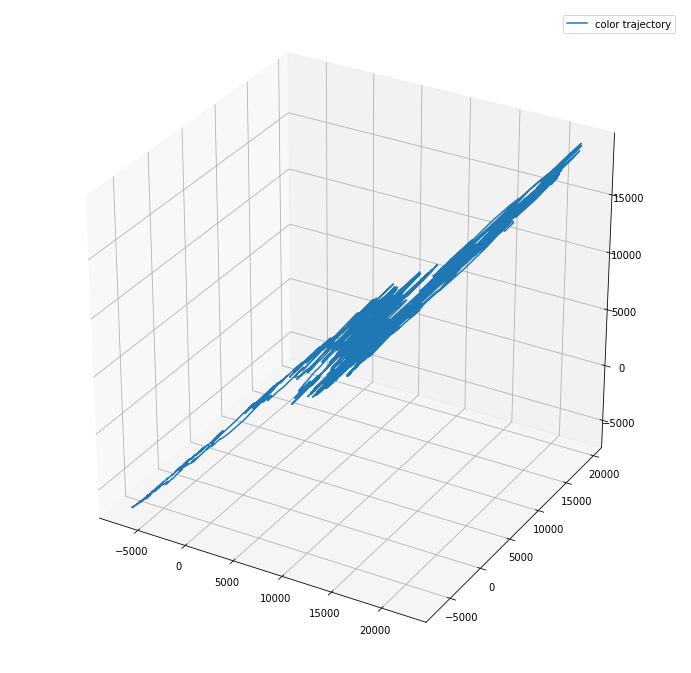

<Figure size 864x864 with 0 Axes>

In [19]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.figsize'] = (12,12)


fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
cmean = np.mean(c[:,1:4])
ax.plot(c[:,3]-cmean, c[:,2]-cmean, c[:,1] -cmean, label='color trajectory')
ax.legend()


plt.show()
plt.savefig("stoch-skycolor.png")

In [36]:
c = newd[2]
tdim = c[:,0]
tdim = (tdim - tdim[0])/3600
dawn = np.where((tdim > 5.5) * (tdim < 10.))

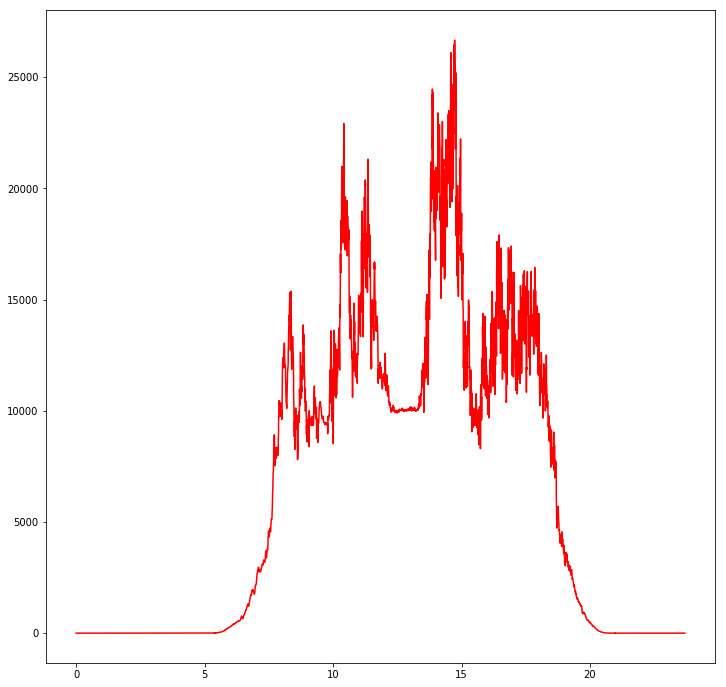

In [40]:
#print(dawn)
start = int(4*3600)
end = int(22.0*3600)
tbase = (c[start:end,0] - c[0,0])/3600.
plt.plot(tdim, c[:,1],'r')


In [2]:
start = 4000
end =   4100
red = np.array(c[start:end,1])
grn = np.array(c[start:end,2])
blu = np.array(c[start:end,3])

print red.shape
mmax = np.max([np.max(red), np.max(blu), np.max(grn)])

red = red/mmax
grn = grn/mmax
blu = blu/mmax


colors = []
for i, r in enumerate(red):
    colors.append(mpl.colors.to_rgb((red[i],grn[i],blu[i])))

#print(colors)


NameError: name 'np' is not defined

In [71]:
# create include file
def rgb_to_hex(r, g, b):
    hc = int(b*255)
    hc = hc + (int(g*255) << 8)
    hc = hc + (int(r*255) << 16)
    return "0x{:x}".format(hc)

c = newd[2]
red = np.array(c[:,1])
grn = np.array(c[:,2])
blu = np.array(c[:,3])

print red.shape
mmax = np.max([np.max(red), np.max(blu), np.max(grn)])

red = red/mmax
grn = grn/mmax
blu = blu/mmax

cinc = open("colors.h",'w')

cinc.write("const PROGMEM prog_uint32_t ctable[]={")

for i, r in enumerate(red):
    c = rgb_to_hex(red[i],grn[i],blu[i])
    # create hex color:
    # will have extra comma at end, sorry
    if i == len(red) -1:
        cinc.write("{:s}}};\n".format(c) )
    else:
        cinc.write("{:s},\n".format(c) )

cinc.write("\n#define CTAB_LEN {:d}\n".format(i) )
cinc.write("#define SECS_PER_C {:f}\n".format((24*3600.)/i) )
cinc.close()
    

(7419L,)


In [1]:
mpl.rcParams['figure.figsize'] = (18, 6)

fig, ax = plt.subplots()

#cmap = mpl.cm.cool
#colors = ["#eaa941", "#efef39", "#53a447", "#3b387f", "#48a2ba"]
cmap= mpl.colors.ListedColormap(colors)

norm = mpl.colors.Normalize(vmin=4, vmax=22.0)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
#cb1.set_label('Some Units')
fig.show()
plt.savefig("colorbar.png")

NameError: name 'mpl' is not defined

In [9]:
print(65535/mmax)

2.199234873653478


In [45]:
with open('skycolors.csv', 'w+') as f:
    for i, r in enumerate(red):
        f.write("{:f},{:f},{:f}\n".format(red[i],grn[i],blu[i]))

    

(3L, 7419L)
(3000L, 742L, 3L)


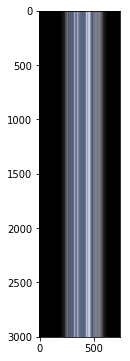

In [79]:


import scipy.signal

def proc_map():
    pass

from PIL import Image, ImageDraw

colors = np.array((red, grn,blu))
print colors.shape
dcol =  scipy.signal.decimate(colors, 10, n=None, ftype='iir', axis=1, zero_phase=True)

dcol_wide = np.multiply.outer(np.ones((3000)),dcol)
dcol_wide = np.swapaxes(dcol_wide,1,2)
print dcol_wide.shape

#img = Image.new('RGB', dcol, color = 'red')

#img.save('pil_red.png')

plt.imshow(dcol_wide)

In [6]:
import scipy.signal
from PIL import Image, ImageDraw

days_raw = np.array([],dtype=float)
for d in newd[:]:
    colors = d[:,1:4]
    # gamma correct
    #colors = colors/np.max(colors)

    #colors = colors/mmax
    
    print colors.shape
    dcol = colors
    #dcol =  scipy.signal.decimate(colors, 10, n=None, ftype='iir', axis=0, zero_phase=True)
    #dcol =  scipy.signal.decimate(dcol, 10, n=None, ftype='iir', axis=0, zero_phase=True)
    dcol_wide = np.multiply.outer(np.ones((10)),dcol)
    if len(days_raw) == 0:
        days_raw = dcol_wide
    else:
        days_raw = np.concatenate((days_raw,dcol_wide),0)
    print days_raw.shape
    #days_raw.extend(dcol_wide)

    
#dcol_wide = np.multiply.outer(np.ones((500)),dcol)
#dcol_wide = np.swapaxes(dcol_wide,1,2)
days_raw = np.array(days_raw,dtype=float)
#print days.shape
print "done"

(7111L, 3L)
(10L, 7111L, 3L)
(7111L, 3L)
(20L, 7111L, 3L)
(7111L, 3L)
(30L, 7111L, 3L)
(7111L, 3L)
(40L, 7111L, 3L)
(7111L, 3L)
(50L, 7111L, 3L)
(7111L, 3L)
(60L, 7111L, 3L)
(7111L, 3L)
(70L, 7111L, 3L)
(7111L, 3L)
(80L, 7111L, 3L)
(7111L, 3L)
(90L, 7111L, 3L)
(7111L, 3L)
(100L, 7111L, 3L)
(7111L, 3L)
(110L, 7111L, 3L)
(7111L, 3L)
(120L, 7111L, 3L)
(7111L, 3L)
(130L, 7111L, 3L)
(7111L, 3L)
(140L, 7111L, 3L)
(7111L, 3L)
(150L, 7111L, 3L)
(7111L, 3L)
(160L, 7111L, 3L)
(7111L, 3L)
(170L, 7111L, 3L)
(7111L, 3L)
(180L, 7111L, 3L)
(7111L, 3L)
(190L, 7111L, 3L)
(7111L, 3L)
(200L, 7111L, 3L)
(7111L, 3L)
(210L, 7111L, 3L)
(7111L, 3L)
(220L, 7111L, 3L)
(7111L, 3L)
(230L, 7111L, 3L)
(7111L, 3L)
(240L, 7111L, 3L)
(7111L, 3L)
(250L, 7111L, 3L)
(7111L, 3L)
(260L, 7111L, 3L)
(7111L, 3L)
(270L, 7111L, 3L)
(7111L, 3L)
(280L, 7111L, 3L)
(7111L, 3L)
(290L, 7111L, 3L)
(7111L, 3L)
(300L, 7111L, 3L)
(7111L, 3L)
(310L, 7111L, 3L)
(7111L, 3L)
(320L, 7111L, 3L)
(7111L, 3L)
(330L, 7111L, 3L)
(7111L, 3L)
(340L, 

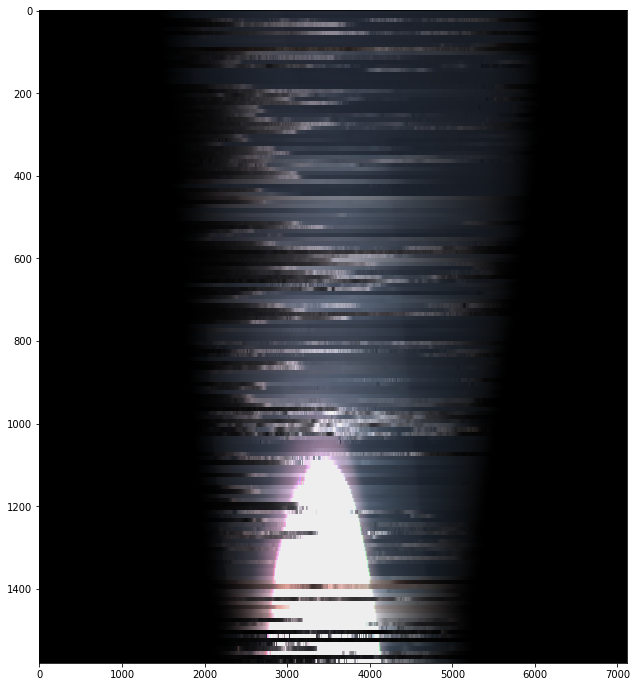

In [7]:
import gc
gc.collect()
import imageio

#plt.imshow(daysg)


mpl.rcParams['figure.figsize'] = (24, 12)
daysn = days_raw/np.max(days_raw)
#img = Image.new('RGB', dcol, color = 'red')
imageio.imwrite('days-norm.png', (255*daysn).astype(np.uint8))
#img.save('pil_red.png')

plt.imshow(daysn,aspect=5)


C:\Users\foote\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


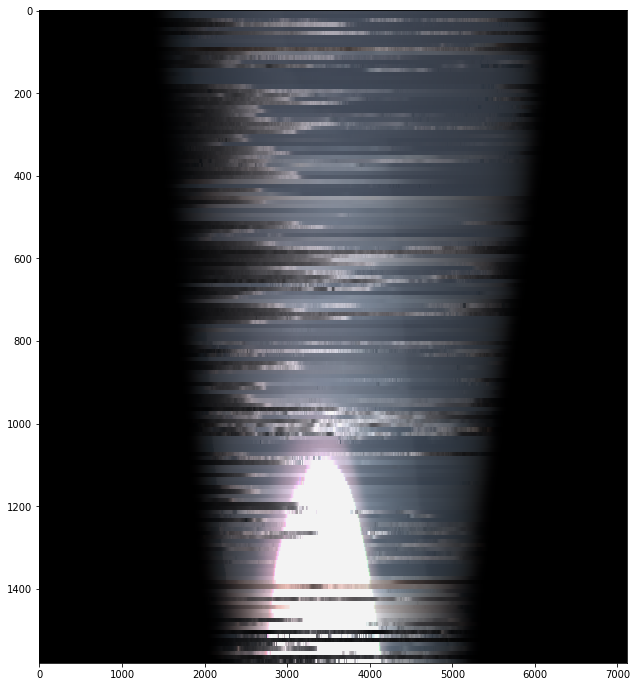

In [8]:
import imageio

daysg = (daysn)**(1/1.5)
plt.imshow(daysg, aspect=5)
imageio.imwrite('days-gamma.png', (255*daysg).astype(np.uint8))

In [10]:
import imageio

#plt.imshow(daysg)
imageio.imwrite('days-norm.png', (255*daysn).astype(np.uint8))
imageio.imwrite('days-gamma.png', (255*daysn).astype(np.uint8))

#img = Image.fromarray(days).convert('RGB')

#img.save('days.png')


saved frame000.png
saved
saved frame001.png
saved frame002.png
saved frame003.png
saved frame004.png
saved frame005.png
saved frame006.png
saved frame007.png
saved frame008.png
saved frame009.png
saved frame010.png
saved frame011.png
saved frame012.png
saved frame013.png
saved frame014.png
saved frame015.png
saved frame016.png
saved frame017.png
saved frame018.png
saved frame019.png


KeyboardInterrupt: 

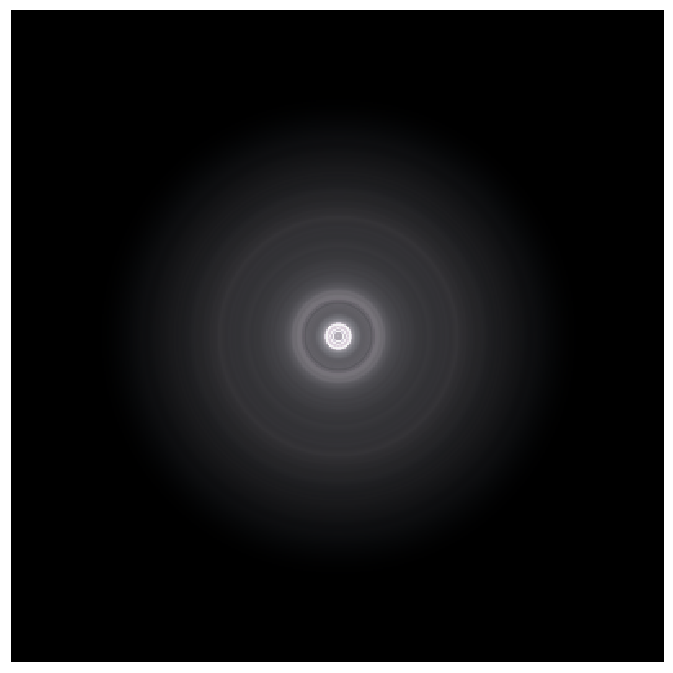

In [11]:
# radial plot

def getcolor(cmap, frac):
    """ go fraction into cmap and return a color triple """
    l, w = cmap.shape
    assert(w ==3)
    i = int(l*frac)
    if i >= l:
        i = l-1
    if i < 0:
        i = 0
    return cmap[i,:]
    

width = 400
height = 400
out = np.zeros((width,height,3),dtype=float)

offset = np.arange(-0.1,1.0, 0.002)
#offset =[0.]
for i, off in enumerate(offset):
    for w in range(width):
        for h in range(height):

            x = (w - width/2)/float(width) 
            y = (h - height/2)/float(height)
            r = np.sqrt(x*x + y*y)
            #th = np.arctan2(y,x)
            #day = int(100*th*4/2*np.pi)
            # want to show morning, so outside (max) is zero and inside (min) is 1/2
            out[h,w] = getcolor(daysg[1200],0.5*(1 + off -r))
        
        
    
    fname  = "frame{:03d}.png".format(i)
    imageio.imwrite(fname, (255*out).astype(np.uint8))
    print "saved " + fname
    if i ==0 :
        fig = plt.figure(frameon=False, figsize = (12,12))
        plt.imshow(out)
        plt.axis('off')  
        fig.axes[0].get_xaxis().set_visible(False)
        fig.axes[0].get_yaxis().set_visible(False)
        #plt.savefig('advance{:03d}.png'.format(i),bbox_inches='tight', pad_inches=0)
        print "saved"
    # to convert to gif with imagemagick
    #$ /cygdrive/c/Program\ Files/ImageMagick-7.0.5-Q16/convert.exe   -delay 7 -loop 0 frame*.png ani.gif
#ffmpeg -r 15 -f image2  -i frame%03d.png -vcodec libx264 -crf 25 -pix_fmt yuv420p  test.mp4


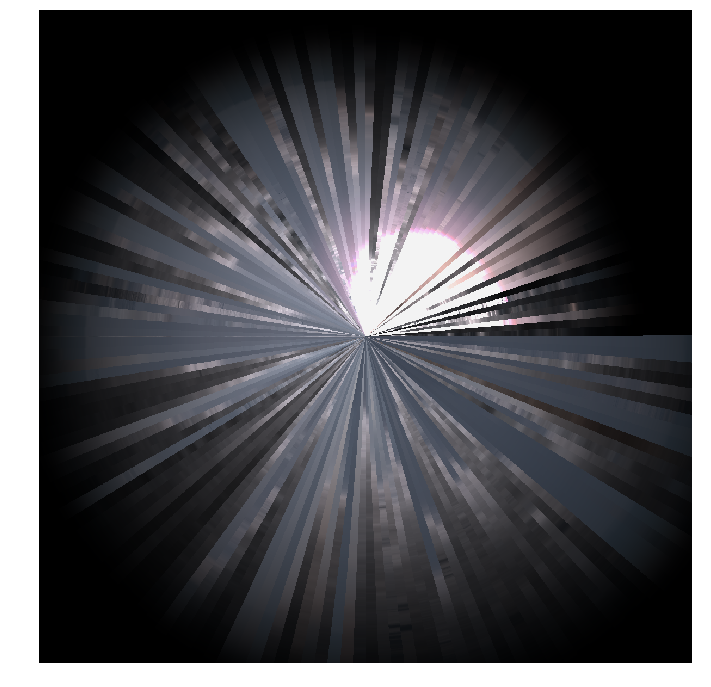

In [13]:
# radial plots

def getcolor(cmap, frac):
    """ go fraction into cmap and return a color triple """
    l, w = cmap.shape
    assert(w ==3)
    i = int(l*frac)
    if i >= l:
        i = l-1
    if i < 0:
        i = 0
    return cmap[i,:]
    

width = 1200
height = 1200
out = np.zeros((width,height,3),dtype=float)

for w in range(width):
    for h in range(height):

        x = (w - width/2)/float(width) 
        y = (h - height/2)/float(height)
        r = np.sqrt(x*x + y*y)
        th = np.arctan2(y,x)
        #print x, y, r
        #out[w,h,:] = [0, 0, 0]
        day = int(200*th*8/(2*np.pi))
        # want to show morning, so outside (max) is zero and inside (min) is 1/2
        out[h,w] = getcolor(daysg[day],0.5*(1-r))
        # want to show evening, so outside (max) is 1 and inside (min) is 1/2
        #out[h,w] = getcolor(days[200],1.2*(r + 1)/2)
        #out[h,w] = getcolor(days[200],r)
        
        
    

plt.figure(figsize = (12,12))
plt.imshow(out)
plt.axis('off')    
plt.savefig('radial4.png')

In [15]:
# spiral plots
from PIL import Image, ImageDraw
im = Image.new('RGBA', (400, 400), (0, 255, 0, 0)) 
draw = ImageDraw.Draw(im) 
draw.line((100,200, 150,300), fill=128)
im.show()

def getcolor(cmap, frac):
    """ go fraction into cmap and return a color triple """
    l, w = cmap.shape
    assert(w ==3)
    i = int(l*frac)
    if i >= l:
        i = l-1
    if i < 0:
        i = 0
    return cmap[i,:]
    


In [14]:
img.save('radialdays.png')

NameError: name 'img' is not defined

In [ ]:
def get_colors_for(c):
    red = c[:,1]
    grn = c[:,2]
    blu = c[:,3]

    mmax = np.max([np.max(red), np.max(blu), np.max(grn)])

    red = red/mmax
    grn = grn/mmax
    blu = blu/mmax


    colors = []
    for i, r in enumerate(red):
        colors.append(mpl.colors.to_rgb((red[i],grn[i],blu[i])))
    return colors

c = get_colors_for(newdata[0])


In [10]:
newd = np.array(newd)
print newd.shape

(10L, 74199L, 5L)


(7419L, 5L)
(7419L, 3L)


ValueError: zero-size array to reduction operation minimum which has no identity

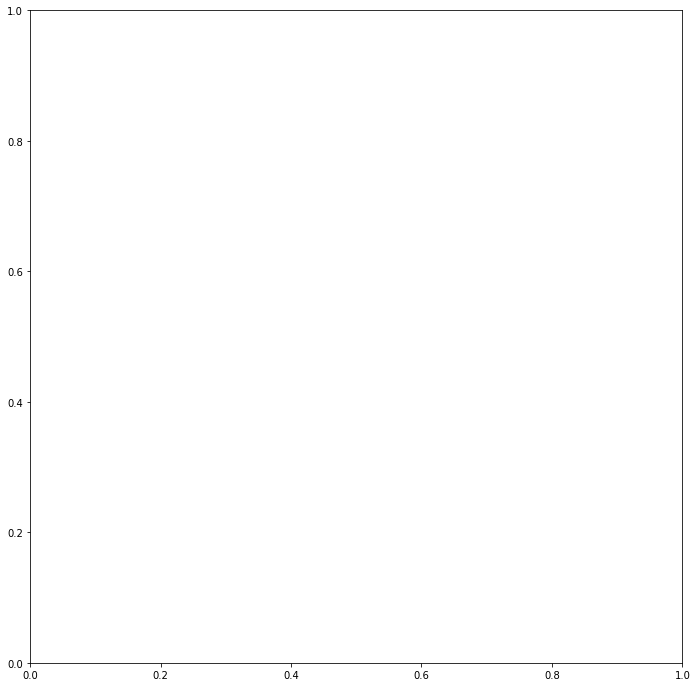

In [87]:
# make rectangular jpeg to wrap a sphere
import scipy.signal
from PIL import Image, ImageDraw

cmap = []
for d in newd[3:4]:
    print d.shape
    colors = d[:,1:4]
    # gamma correct
    colors = (colors / 65535.)**(1/2.2)
    colors = colors/np.max(colors)
    #colors = colors/mmax
    
    print colors.shape
    dcol =  scipy.signal.decimate(colors, 10, n=None, ftype='iir', axis=0, zero_phase=True)
    dcol_wide = np.multiply.outer(np.ones((1000)),dcol)
    cmap.extend(dcol_wide)
    
#dcol_wide = np.multiply.outer(np.ones((500)),dcol)
#dcol_wide = np.swapaxes(dcol_wide,1,2)
cmap = np.swapaxes(cmap,0,1)
cmap = np.array(cmap,dtype=float)
#print days.shape

#daysn = days/np.max(days)

#plt.imshow(cmap[1500:7500,:])
fig = plt.figure(frameon=False, figsize = (12,12))
plt.imshow(cmap[1500:7500,:])
plt.axis('off')  
fig.axes[0].get_xaxis().set_visible(False)
fig.axes[0].get_yaxis().set_visible(False)
plt.savefig('cmap.jpg',bbox_inches='tight', pad_inches=0)

In [ ]:
   fig = plt.figure(frameon=False, figsize = (12,12))
    plt.imshow(out)
    plt.axis('off')  
    fig.axes[0].get_xaxis().set_visible(False)
    fig.axes[0].get_yaxis().set_visible(False)
    plt.savefig('advance{:03d}.png'.format(i),bbox_inches='tight', pad_inches=0)